# Analyse wavefields

This notebook checks the velocity models and FD simulations output by `generate_velocity_models.py` and `generate_forward_simulations.py` are sensible.

In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import scipy as sp
import sys
sys.path.insert(0, '../shared_modules/')
import plot_utils
%matplotlib inline

## Load example velocity model and FD simulation

In [2]:
# PARAMETERS

VEL_RUN = "marmousi"
SIM_RUN = "marmousi_2ms"


VEL_DIR =  "velocity/" + VEL_RUN + "/"
OUT_SIM_DIR = "gather/" + SIM_RUN + "/"

isim=(20,1)
wavefields = np.load(OUT_SIM_DIR + "wavefields_%.8i_%.8i.npy"%(isim[0],isim[1]))
wavefields = wavefields[::4]
gather = np.load(OUT_SIM_DIR + "gather_%.8i_%.8i.npy"%(isim[0],isim[1]))
velocity = np.load(VEL_DIR + "velocity_%.8i.npy"%(isim[0]))
source_is = np.load(OUT_SIM_DIR + "source_is.npy")
receiver_is = np.load(OUT_SIM_DIR + "receiver_is.npy")

DELTAT = 0.002
source_i = source_is[isim[0],isim[1]]

print(velocity.shape, velocity[0,0])
print(wavefields.shape, np.max(wavefields))
print(gather.shape)
print(receiver_is.shape, source_is.shape)
#print(receiver_is)
#print(source_is)
print(source_i)

(128, 128) 1591.9983
(512, 128, 128) 77.329346
(32, 512)
(32, 2) (100, 3, 2)
[20 14]


## Create wavefield animation

<IPython.core.display.Javascript object>


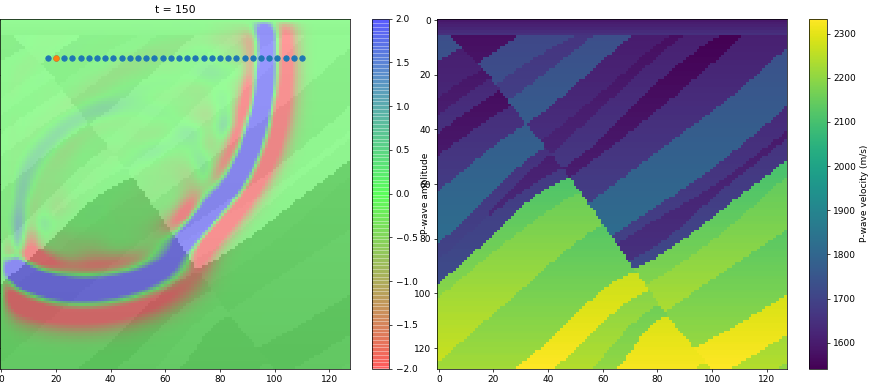

In [3]:
%matplotlib notebook

# define initial plots
fig = plt.figure(figsize=(13.5,6))
plt.subplot(1,2,2)
plt.imshow(velocity.T, cmap="viridis")
cb = plt.colorbar()
cb.ax.set_ylabel('P-wave velocity (m/s)')
plt.subplot(1,2,1)
plt.imshow(velocity.T, alpha=0.4, cmap="gray_r")
im = plt.imshow(wavefields[0].T, aspect=1, cmap=plot_utils.rgb, alpha=0.4, vmin = -2, vmax=2)
cb = plt.colorbar()
cb.ax.set_ylabel('P-wave amplitude')
plt.scatter(receiver_is[:,0], receiver_is[:,1])
plt.scatter(source_i[0], source_i[1])

# define animation update function
def update(i):
    # set the data in the im object
    plt.title("t = %i"%(i))
    im.set_data(wavefields[i].T)
    return [im]# tells the animator which parts of the plot to update

# start animation
# important: keep the instance to maintain timer
ani = animation.FuncAnimation(fig, update, frames=range(0,wavefields.shape[0],10), interval=100, blit=False)

plt.subplots_adjust(left=0.0, right=1., bottom=0.05, top=0.95, hspace=0.0, wspace=0.0)
plt.show()

In [4]:
ani._stop()

## Check wavefields and gather match

(32, 512) (32, 512)
True
0.00019587894 10.788755416870117


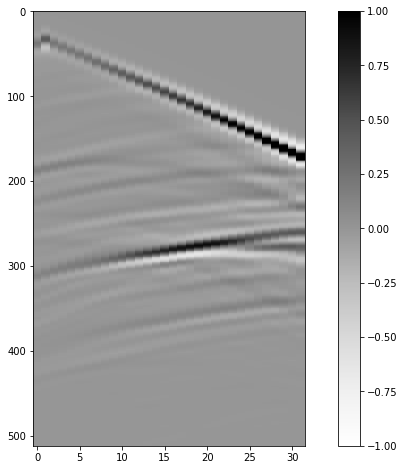

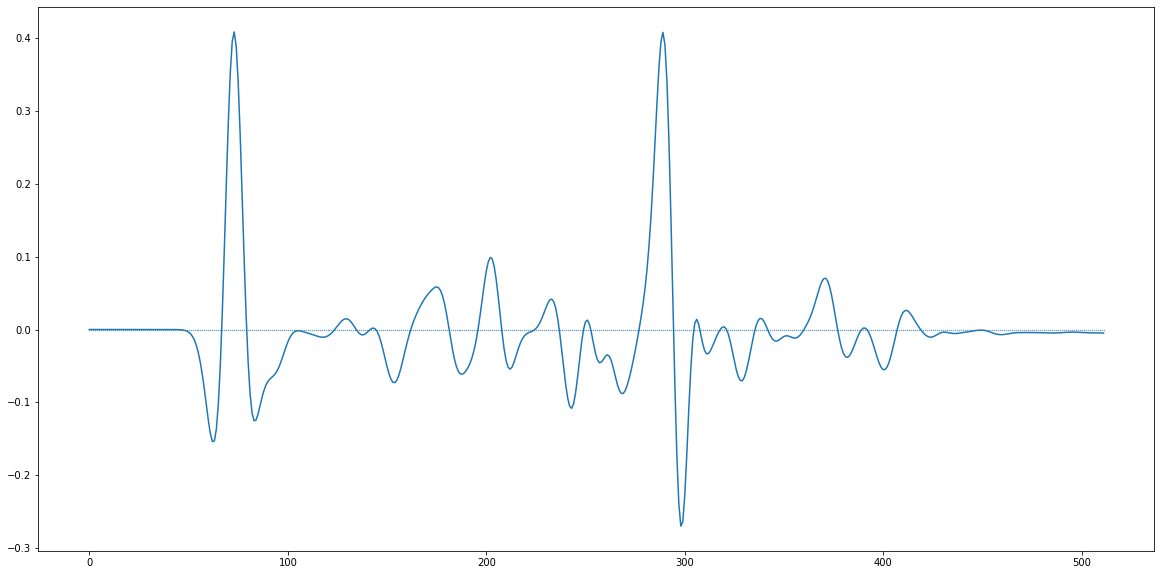

In [5]:
# check wavefields and gather match
gather_test = wavefields[:,receiver_is[:,0], receiver_is[:,1]].T

print(gather.shape, gather_test.shape)
print(np.allclose(gather, gather_test))


# plot gather
%matplotlib inline

print(gather.mean(), 5*gather.std())
gathern = gather/(1)
t = np.arange(gather.shape[1], dtype=np.float32)
t_gain = (t**2.5)
t_gain = t_gain/np.median(t_gain)

plt.figure(figsize=(12,8))
plt.imshow((gathern*t_gain).T, aspect=0.1, cmap="Greys", vmin=-1, vmax=1)
plt.colorbar()

plt.figure(figsize=(20,10))
plt.plot(t.flatten(),(gathern*t_gain)[10,:])
plt.scatter(t.flatten(),np.zeros(gather.shape[1]), s=0.1)

## Plot average frequency spectrum of gather

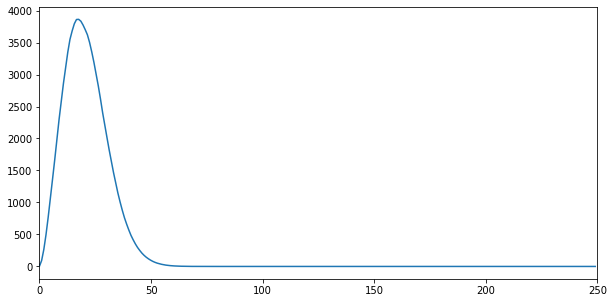

17.578125


In [6]:
# plot average frequency spectrum of gather

s = np.abs(np.fft.fft(gather, axis=1))
s = np.sum(s, axis=0)
f = np.fft.fftfreq(s.shape[0], DELTAT)
plt.figure(figsize=(10,5))
plt.plot(f[np.argsort(f)], s[np.argsort(f)])
plt.xlim(0, 250)
plt.show()
print(f[np.argmax(s)])# dominant frequency

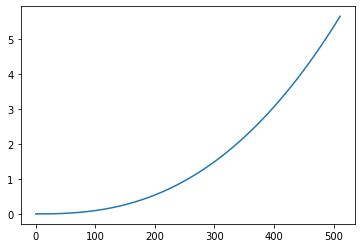

In [7]:
plt.plot(t,t_gain)